In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpl
import datetime as dt
%matplotlib inline

In [2]:
#Creating time period variables for easy usage
days = 700 #I'll analyze last 2 years almost
end = dt.datetime.now() 
start = end - dt.timedelta(days=days)

In [4]:
#Creating tickers for collecting data from yahoo
stocklist = ['BTC-USD','ETH-USD','BNB-USD','AVAX-USD','DOT-USD','LTC-USD','XRP-USD','SOL-USD']

In [5]:
#Download the data
data_dict = {}
for ticker_symbol in stocklist:
    data_dict[ticker_symbol] = yf.download(ticker_symbol, start=start, end=end)
data_dict

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'BTC-USD':                     Open          High           Low         Close  \
 Date                                                                 
 2021-08-21  49327.074219  49717.019531  48312.199219  48905.492188   
 2021-08-22  48869.105469  49471.609375  48199.941406  49321.652344   
 2021-08-23  49291.675781  50482.078125  49074.605469  49546.148438   
 2021-08-24  49562.347656  49878.769531  47687.117188  47706.117188   
 2021-08-25  47727.257812  49202.878906  47163.613281  48960.789062   
 ...                  ...           ...           ...           ...   
 2023-07-17  30249.626953  30336.400391  29685.783203  30145.888672   
 2023-07-18  30147.070312  30233.656250  29556.427734  29856.562500   
 2023-07-19  29862.046875  30184.181641  29794.269531  29913.923828   
 2023-07-20  29915.250000  30195.531250  29638.095703  29792.015625   
 2023-07-22  29910.718750  29991.615234  29859.210938  29909.392578   
 
                Adj Close       Volume  
 Date                  

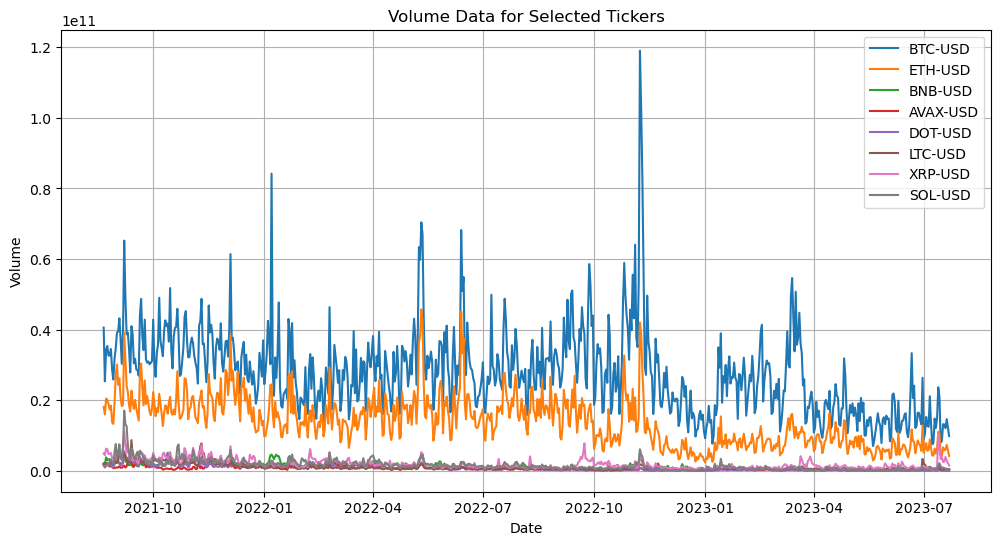

In [6]:
plt.figure(figsize=(12, 6))
for ticker_symbol, data in data_dict.items():
    plt.plot(data.index, data['Volume'], label=ticker_symbol)

plt.title("Volume Data for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Need to split data for meaningfull analyze, cause eth and btc dominates the chart
average_volumes = {ticker_symbol: data['Volume'].mean() for ticker_symbol, data in data_dict.items()}
volume_percentages = {ticker_symbol: (volume_mean / total_volume_mean) * 100 for ticker_symbol, volume_mean in average_volumes.items()}
volume_percentages

{'BTC-USD': 453.94552665678054,
 'ETH-USD': 226.72414370982955,
 'BNB-USD': 21.96413848742825,
 'AVAX-USD': 10.729809786232106,
 'DOT-USD': 12.539273220124924,
 'LTC-USD': 16.49039575647649,
 'XRP-USD': 31.902301500593023,
 'SOL-USD': 25.704410882534983}

In [17]:
#We have enough information to split tickers
low_volume_threshold = 0.2  
mid_volume_threshold = 0.35 
total_volume_mean = sum(average_volumes.values()) / len(average_volumes)
low_volume_tickers = {ticker_symbol: data for ticker_symbol, data in data_dict.items() if average_volumes[ticker_symbol] < (total_volume_mean * low_volume_threshold)}
mid_volume_tickers = {ticker_symbol: data for ticker_symbol, data in data_dict.items() if (total_volume_mean * low_volume_threshold) <= average_volumes[ticker_symbol] < (total_volume_mean * mid_volume_threshold)}
high_volume_tickers = {ticker_symbol: data for ticker_symbol, data in data_dict.items() if average_volumes[ticker_symbol] >= (total_volume_mean * mid_volume_threshold)}

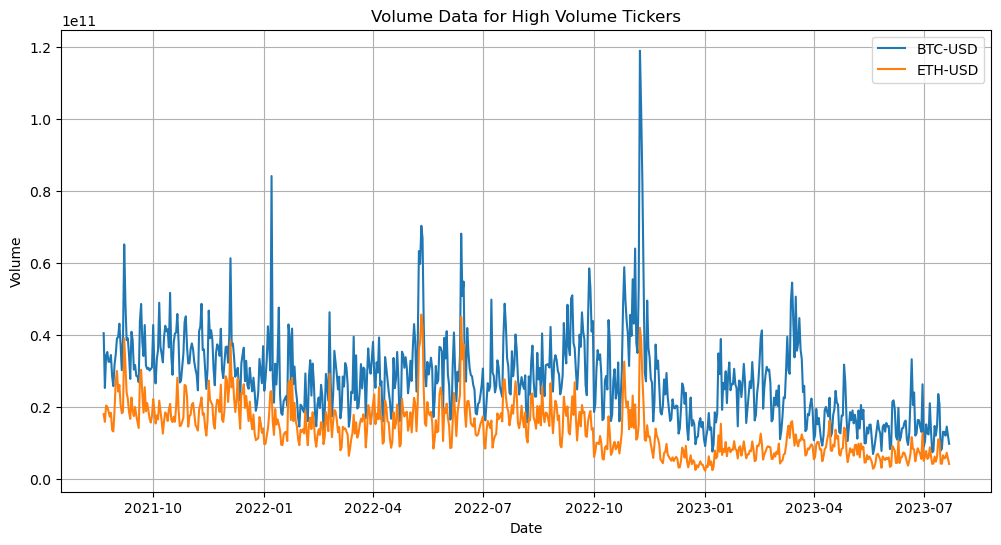

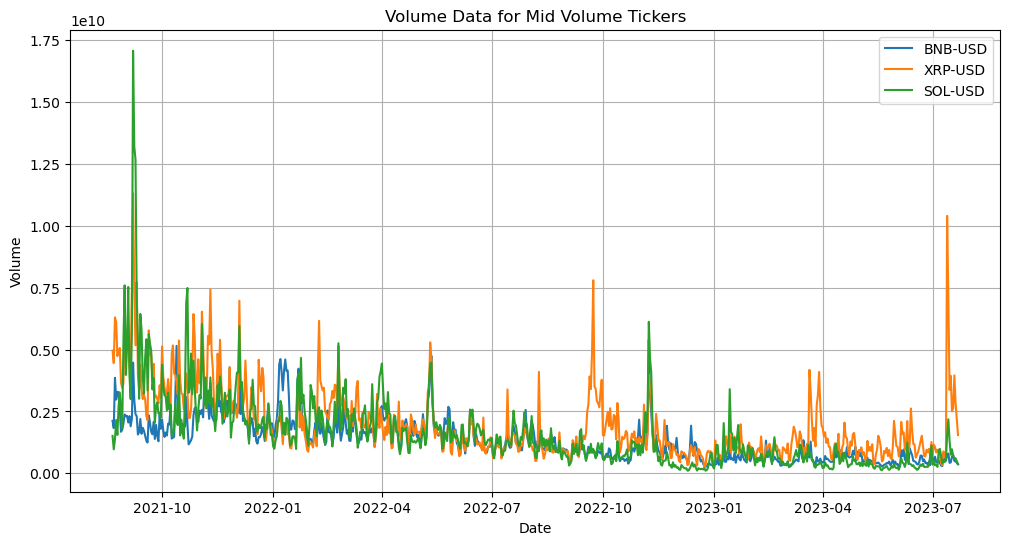

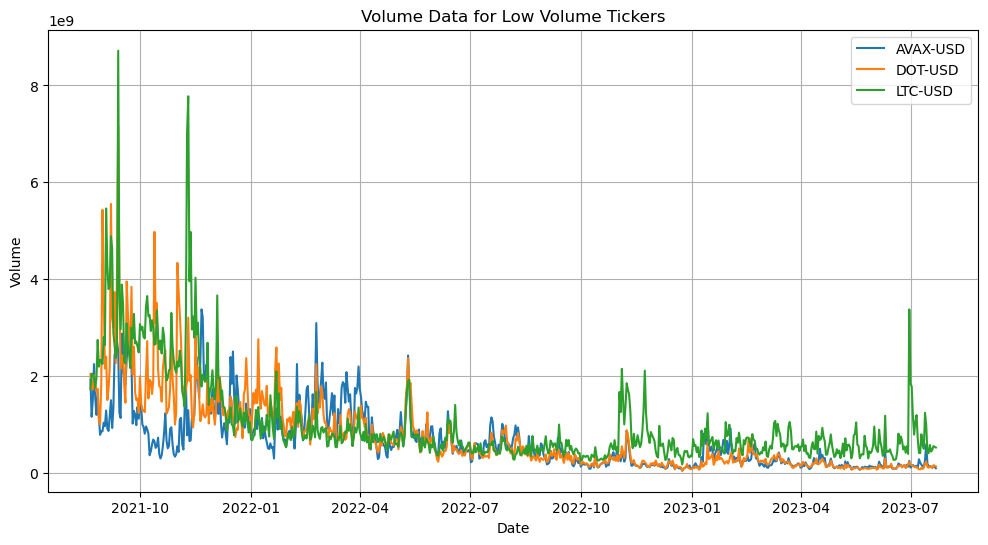

In [18]:
#Plotting
def plot_volume_data(data_dict, title):
    plt.figure(figsize=(12, 6))
    for ticker_symbol, data in data_dict.items():
        plt.plot(data.index, data['Volume'], label=ticker_symbol)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_volume_data(high_volume_tickers, "Volume Data for High Volume Tickers")
plot_volume_data(mid_volume_tickers, "Volume Data for Mid Volume Tickers")
plot_volume_data(low_volume_tickers, "Volume Data for Low Volume Tickers")

In [26]:
#Defining function for analyzing correlations
#Also i wanna fancy graphs
import seaborn as sns
def calculate_and_display_correlation(data_dict, title):
    df = pd.DataFrame({ticker_symbol: data['Volume'] for ticker_symbol, data in data_dict.items()})
    correlation_matrix = df.corr()
    print(f"\nCorrelation Matrix for {title}:")
    print(correlation_matrix)

In [28]:
calculate_and_display_correlation(low_volume_tickers, "Low Volume Tickers")

calculate_and_display_correlation(mid_volume_tickers, "Mid Volume Tickers")

calculate_and_display_correlation(high_volume_tickers, "High Volume Tickers")


Correlation Matrix for Low Volume Tickers:
          AVAX-USD   DOT-USD   LTC-USD
AVAX-USD  1.000000  0.673898  0.498266
DOT-USD   0.673898  1.000000  0.779777
LTC-USD   0.498266  0.779777  1.000000

Correlation Matrix for Mid Volume Tickers:
          BNB-USD   XRP-USD   SOL-USD
BNB-USD  1.000000  0.583197  0.674979
XRP-USD  0.583197  1.000000  0.695333
SOL-USD  0.674979  0.695333  1.000000

Correlation Matrix for High Volume Tickers:
          BTC-USD   ETH-USD
BTC-USD  1.000000  0.820474
ETH-USD  0.820474  1.000000
